Column Names: Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')
Sample Data:
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       109

c:\Users\varsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


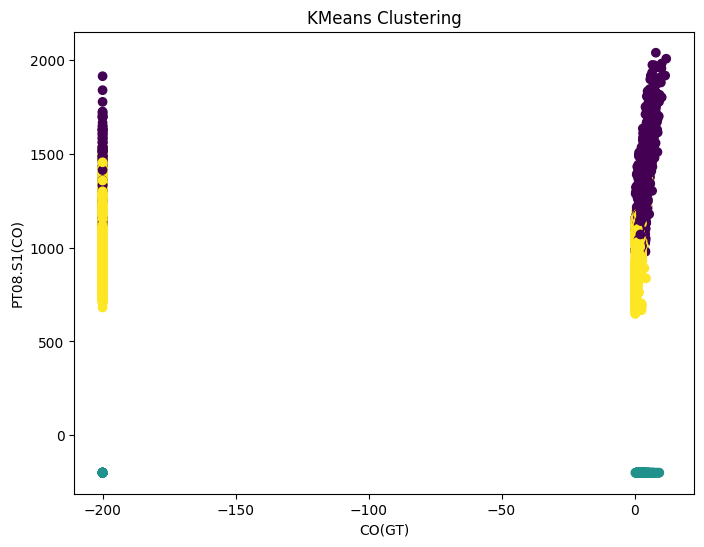


Model saved as 'best_model.pkl'


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle

# Step 1: Load the Excel file
df = pd.read_excel(r'C:\Users\varsha\OneDrive\Documents\bda microproject\AQI\AirQualityUCI.xlsx')

# Step 2: Check the loaded data
print("Column Names:", df.columns)
print("Sample Data:\n", df.head())

# Step 3: Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Step 4: Convert 'Date' and 'Time' columns to a single datetime column
if 'Date' in df.columns and 'Time' in df.columns:
    # If 'Date' is already a datetime object, convert 'Time' and combine
    df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')
    df.drop(['Date', 'Time'], axis=1, inplace=True)  # Drop original columns
else:
    print("Error: Columns 'Date' or 'Time' not found!")

# Step 5: Handle missing values by filling with mean
df.fillna(df.mean(), inplace=True)

# Step 6: Feature scaling (Standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['DateTime'], axis=1))

# Step 7: Prepare the dataset for training
X = scaled_features
y = df['C6H6(GT)']  # Using 'C6H6(GT)' as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Apply Decision Tree Regressor
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("\nDecision Tree Regressor")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_dt):.4f}")

# Step 9: Apply Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("\nLinear Regression")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")

# Step 10: Clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize KMeans Clustering (using first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('KMeans Clustering')
plt.show()

# Step 11: Save the best model as a pickle file
best_model = model_dt if r2_score(y_test, y_pred_dt) > r2_score(y_test, y_pred_lr) else model_lr
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("\nModel saved as 'best_model.pkl'")
